# Задача 1
##Постановка задачи:
В цехах N1 и N2 предприятия производится продукт Y, который в дальнейшем используется
в качестве исходного материала для производства изделий в цехе N3. Суммарная производительность цехов N1 и N2 зависит от вложения дополнительных средств X. При работе цехов N1
и N2 в течение одного месяца эта зависимость может быть приближенно представлена в виде
функций:

• N1: y = 4+ (x+18)^1/3;

• N2: y = 3+ (x+12)^1/3;
Функции остатка средств в течение месяца:

• N1: 0.61x;

• N2: 0.83x.

Средства,выделяемые на оба цеха в течение квартала (3 месяца), составляют 134 единиц;
перераспределение производится помесячно.
Требуется распределить средства на планируемый квартал с целью получения максимального количества продукта Y.

##ФОРМАЛИЗАЦИЯ:
Дано: X = 134

Для решения данной задачи необходимо построить функцию суммарной производительности цехов N1 и N2 за весь квартал и определить ее максимум.

За один месяц цех N1 производит:

y1 = 4 + (x11 + 18)^1/3

За три месяца цех N1 производит:

y = 12 + (x11 + 18)^1/3 + (x12 + 18)^1/3 + (x13 + 18)^1/3

Аналогично для цеха N2:

y2 = 3 + (x21 + 12)^1/3

y = 9 + (x21 + 12)^1/3 + (x22 + 12)^1/3 + (x23 + 12)^1/3

Суммарная производительность цехов за квартал будет:

Y = y1 + y2 = 21 + (x11 + 18)^1/3 + (x12 + 18)^1/3 + (x13 + 18)^1/3 + (x21 + 12)^1/3 + (x22 + 12)^1/3 + (x23 + 12)^1/3

X = x11 + x21

Остаток средств после месяца использования для цеха N1:

K1 = 0.61x

Остаток средств после месяца использования для цеха N2:

K2 = 0.83x

Общий остаток средств после первого месяца:

k1 = K1 + K2 = 0.61 * x11 + 0.83 * x21 = x12 + x22

На второй месяц остается средств:

k2 = 0.61 * x12 + 0.83 * x22 = x13 + x23

На третий месяц остается средств:

k3 = 0.61 * x13 + 0.83 * x23

Основное функциональное уравнение динамического программирования для решения задачи:

Wi (ki) = max ⁡{ 7 + (x + 4)^(1/3) + (x + 3)^(1/3) + W(i+1) (0.61x + 0.83(k-x))}, где xi <= ki

##Построим график суммарной производительности цехов за месяц.

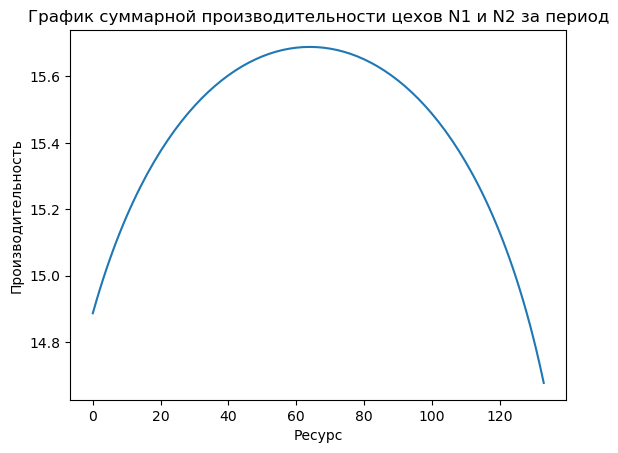

In [6]:
import matplotlib.pyplot as plot

def func(x, k):
    return 7+(x+18)**(1/3)+((k-x)+12)**(1/3)

sum_productivity = []
Ox = []
total_funds = 134

for x in range(0, total_funds):
    sum_productivity.append(func(x, total_funds))
    Ox.append(x)

plot.plot(Ox, sum_productivity)
plot.xlabel('Ресурс')
plot.ylabel('Производительность')
plot.title('График суммарной производительности цехов N1 и N2 за период')
plot.show()

На основе приведённого выше графика можно найти локальный максимум - точку (64, 15.68).
Таким образом, можно сделать вывод, что в первый месяц квартала x11=64, x21=k-x11=134-64=70
Далее приведён листинг кода, который расчитывает значения для всех трёх месяцев квартала:

In [13]:
import math

# Производительность цеха N1:
def y_N1(x):
    return 4 + math.pow(x+18, 1/3)

# Производительность цеха N2:
def y_N2(x):
    return 3 + math.pow(x+12, 1/3)

# Функция остатка средств в цехе N1:
def r_N1(x):
    return 0.61*x

# Функция остатка средств в цехе N2:
def r_N2(x):
    return 0.83*x

# Общее количество средств на квартал
total_funds = 134

#Функция расчёта максимума производительности за месяц
def calc(k, index):
    if index >2:
        return 0, k, 0 
    res = 0 #производительность
    ost = 0 #остаток средств
    max_r = 0.0 #максимальная производительность
    max_o = 0.0 #остаток средстви при условии максимума производительности
    dot = []
    for x in range (0, k+1):
        res = y_N1(x) + y_N2(k-x)
        ost = r_N1(x) + r_N2(k-x)
        if res > max_r:
            max_r = res
            max_o = ost
            dot.clear()
            dot.append(x)
    r = calc(int(max_o), index+1)
    dot.append(r[2])
    print(f"Максимальная производительность = {round(max_r,2)}\nОстаток средств = {round(max_o,2)}\nx1,{index+1} = {dot[0]}")
    return max_r+r[0], r[1], dot #Возвращает суммарную производительность, остаток, значения x11, x12, x13

r = calc(total_funds, 0)
print(f"\nРЕЗУЛЬТАТ:\nСуммарная производительность = {round(r[0],2)}\nОстаток средств за квартал = {round(r[1],2)}\nМассив X = {r[2]}")

Максимальная производительность = 14.37
Остаток средств = 51.06
x1,3 = 32
Максимальная производительность = 14.98
Остаток средств = 70.61
x1,2 = 45
Максимальная производительность = 15.69
Остаток средств = 97.14
x1,1 = 64

РЕЗУЛЬТАТ:
Суммарная производительность = 45.04
Остаток средств за квартал = 51
Массив X = [64, [45, [32, 0]]]


**ВЫВОД:**
Максимальная суммарная производительность цехов равна 45 изделиям Y за квартал
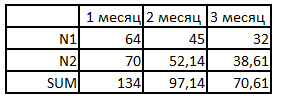